In [2]:
import pandas as pd
import numpy as np
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import missingno

import matplotlib.pyplot as plt

df = pd.read_csv("store.csv")
df.head()

,BranchName,Week,DayWeek,Day,Month,Hour,Transaction_Type,Units,Amount
0,MyStore,1,3,2,1,9,Card,3,$54.00
1,MyStore,1,3,2,1,10,Cash,7,-$17.80
2,MyStore,1,3,2,1,10,Card,7,$41.99
3,MyStore,1,3,2,1,11,Card,20,$412.50
4,MyStore,1,3,2,1,12,Cash,1,-$18.00


First, let us clean the data set ready for the analysis. As you can see there is a dollar sign in front of every Amount. This will make it very difficult to perform mathematical operations. As part of the cleaning, we will remove the dollar sign.

In [3]:
df['Amount'] = df['Amount'].str.replace('$','').str.replace(',','')
df['Amount'] = pd.to_numeric(df['Amount'])
df.head()


,BranchName,Week,DayWeek,Day,Month,Hour,Transaction_Type,Units,Amount
0,MyStore,1,3,2,1,9,Card,3,54.00
1,MyStore,1,3,2,1,10,Cash,7,-17.80
2,MyStore,1,3,2,1,10,Card,7,41.99
3,MyStore,1,3,2,1,11,Card,20,412.50
4,MyStore,1,3,2,1,12,Cash,1,-18.00


Another thing to note is in the Branch name variable, only one branch is seen through out the whole data frame. We therefore do not need this variable. If the data was from different stores we would have need for it. Below we drop the variable from the data frame

In [4]:
df.drop('BranchName',axis=1, inplace=True)
df.head(10)

,Week,DayWeek,Day,Month,Hour,Transaction_Type,Units,Amount
0,1,3,2,1,9,Card,3,54.00
1,1,3,2,1,10,Cash,7,-17.80
2,1,3,2,1,10,Card,7,41.99
3,1,3,2,1,11,Card,20,412.50
4,1,3,2,1,12,Cash,1,-18.00
5,1,3,2,1,12,Card,1,-5.00
6,1,3,2,1,12,Card,15,118.50
7,1,3,2,1,13,Cash,90,-94.92
8,1,3,2,1,13,Card,28,423.50
9,1,3,2,1,14,Cash,34,-95.39


Always check out for missing values, fortunately for this datset we have no missing values, This is not always the case and it is important to remember ways to handle missing data that we tackled in the previous task.

In [5]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:8]

Week                0
DayWeek             0
Day                 0
Month               0
Hour                0
Transaction_Type    0
Units               0
Amount              0
dtype: int64

From the histogram below, we can see that the range is -1000 to 1000. Well, it is unusual for the a purchase to total to a negative value. 

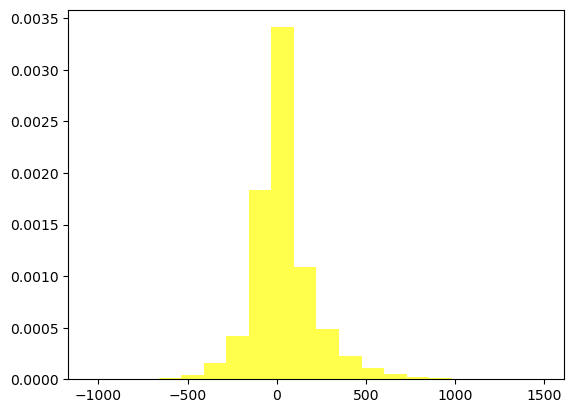

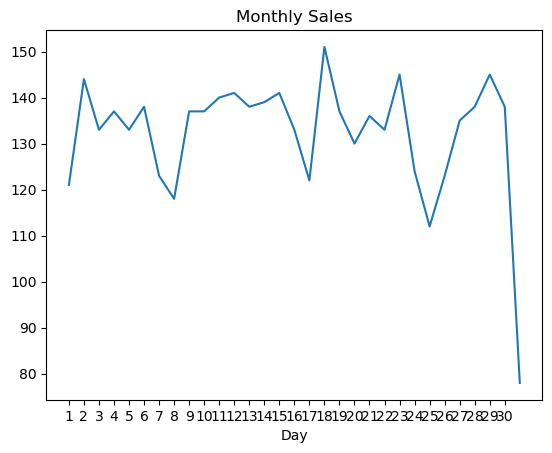

In [6]:

plt.hist(df['Amount'], 20, density =1,facecolor="yellow", alpha=0.7)
plt.show()

test = df['Amount'].groupby(df['Day']).size()
plot_month = test.plot(title = 'Monthly Sales', xticks = (range(1,31)))



In [7]:
positive = df.Amount[df['Amount'] > 0].count()
negative = df.Amount[df['Amount'] < 0].count()
print( 'positive = ', positive,'negative = ', negative)

positive =  1968 negative =  2131


As you can see, there are more negative than positive values for amounts. At this point one would investigate why the company is recording negative values. Transactions made on credit, among other causes, may inform the analysis.

In [8]:
sales_by_card = df.groupby('Transaction_Type').size()

print(sales_by_card)

Transaction_Type
Card    2811
Cash    1289
dtype: int64


###  Sales by Month


Text(0, 0.5, 'Total Sales')

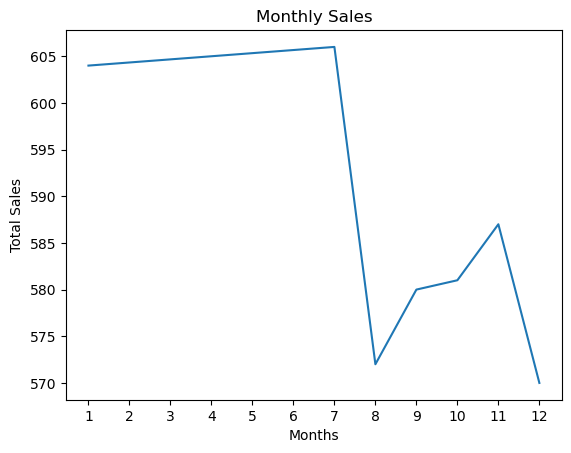

In [9]:
sales_by_month = df.groupby('Month').size()
plot_month = sales_by_month.plot(title = 'Monthly Sales', xticks = (1,2,3,4,5,6,7,8,9,10,11,12))
plot_month.set_xlabel('Months')
plot_month.set_ylabel('Total Sales')



This shows that from January to July the sales were almost steady but then something happened  and the sales declined rapidly. This can show that an investigation needs to be done on what changed around that time. This is how we explore our data and do investigations. Some assumptions would be that we changed the store's opening hours or that the vendors and suppliers had changed.

### Sales by Day

Text(0, 0.5, 'Total Sales')

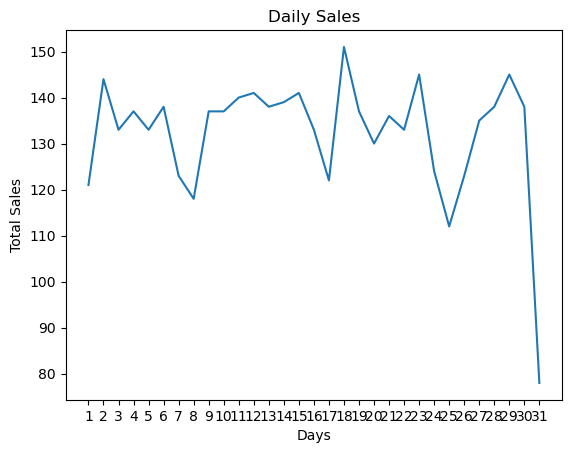

In [10]:
sales_by_month = df.groupby('Day').size()
plot_month = sales_by_month.plot(title = 'Daily Sales', xticks = (range(1,32)))
plot_month.set_xlabel('Days')
plot_month.set_ylabel('Total Sales')

Sales were fluctuating throughout the month but surprisingly there seems to be a significant drop at the end of the month. This is another point to investigate. I could assume that the sales would increase at the end of the month but this seems to be contrary. Finding the reason behind it can be very interesting. Do you have any assumptions?


### Sale by Hour


Text(0, 0.5, 'Total Sales')

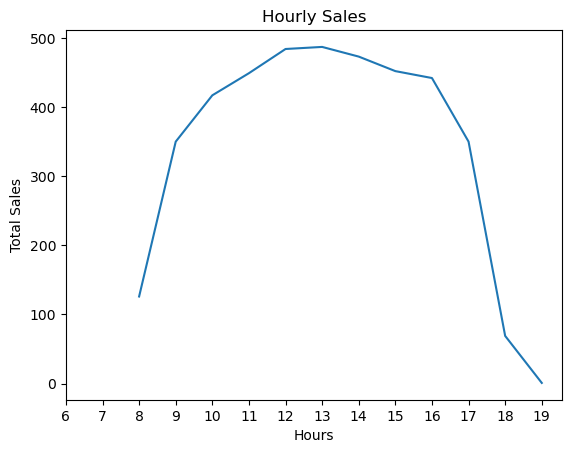

In [11]:

sales_by_month = df.groupby('Hour').size()
plot_month = sales_by_month.plot(title = 'Hourly Sales', xticks = (range(6,20)))
plot_month.set_xlabel('Hours')
plot_month.set_ylabel('Total Sales')

The sales seem to take a bell shape. The sales are highest from 11:00AM to 4:00PM. More customers are visiting in the afternoon rather than at the opening and closing times. This is useful information for the administration deptartment when it comes to managing staffing hours.


---

Great, now that we have some background in storytelling in EDA now let us begin from the top.


### Exploratory Data Analysis on the Balance data set

We have handled the balance data set before but we only handled missing values. We will now expand on this.

According to our rubric, we'll take the following steps. 

#### 1. What question are you trying to solve (or prove wrong)?

For this data set what we can build is a model that, according to the present variables, can predict the balance of future clients.


#### 2. What kind of data do you have?
Is your data numerical, categorical or something else? How do you deal with each kind?

As we can observe, we have 

Balance - [double][Continuous] The balance in the clients account

Income - [double][Continuous] The clients income.

Limit - [integer][Continuous] This is the credit card limit

Rating - [Double][Continuous] This is the Rating given to a client.

Cards - [Integer][Categorical] This is the number of cards the client 
has

Age -  [Integer][Categorical] This is the age of the client

Education - [Integer] [Categorical]This is the highest level of education attained by the client.

Gender - [String] [Categorical] Male or Female

Student - [String] [Categorical] Yes - the client is a student No - 
Client is not a student

Married -  [String] [Categorical] Yes - Client is married No - client is unmarried.

Ethnicity - [String] [Categorical] client can be Caucasion,Asian or African


In [12]:
balance = pd.read_csv('balance.txt', delim_whitespace=True)
balance.head(10)

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
0,12.240798,14.891,3606,283.0,2.0,NaN,11.0,Male,No,Yes,Caucasian
1,23.283334,NaN,6645,483.0,3.0,82.0,15.0,Female,NaN,Yes,Asian
2,22.530409,104.593,7075,NaN,4.0,71.0,11.0,Male,No,No,Asian
3,27.652811,148.924,9504,681.0,3.0,36.0,11.0,NaN,No,No,Asian
4,16.893978,55.882,4897,357.0,2.0,68.0,16.0,Male,No,Yes,Caucasian
5,22.486178,80.180,8047,569.0,4.0,77.0,10.0,Male,No,No,Caucasian
6,10.574516,20.996,3388,259.0,2.0,37.0,12.0,Female,No,No,African American
7,14.576204,71.408,7114,512.0,2.0,87.0,9.0,Male,No,No,Asian
8,7.938090,15.125,3300,266.0,5.0,66.0,13.0,Female,No,No,Caucasian
9,17.756965,71.061,6819,491.0,3.0,41.0,19.0,Female,Yes,Yes,African American


#### 3. What’s missing from the data and how do you deal with?

What missing values are there?
Where are the holes in our data?

These are rows which are missing a value or have NaN instead of something like the rest of the column.

<Axes: >

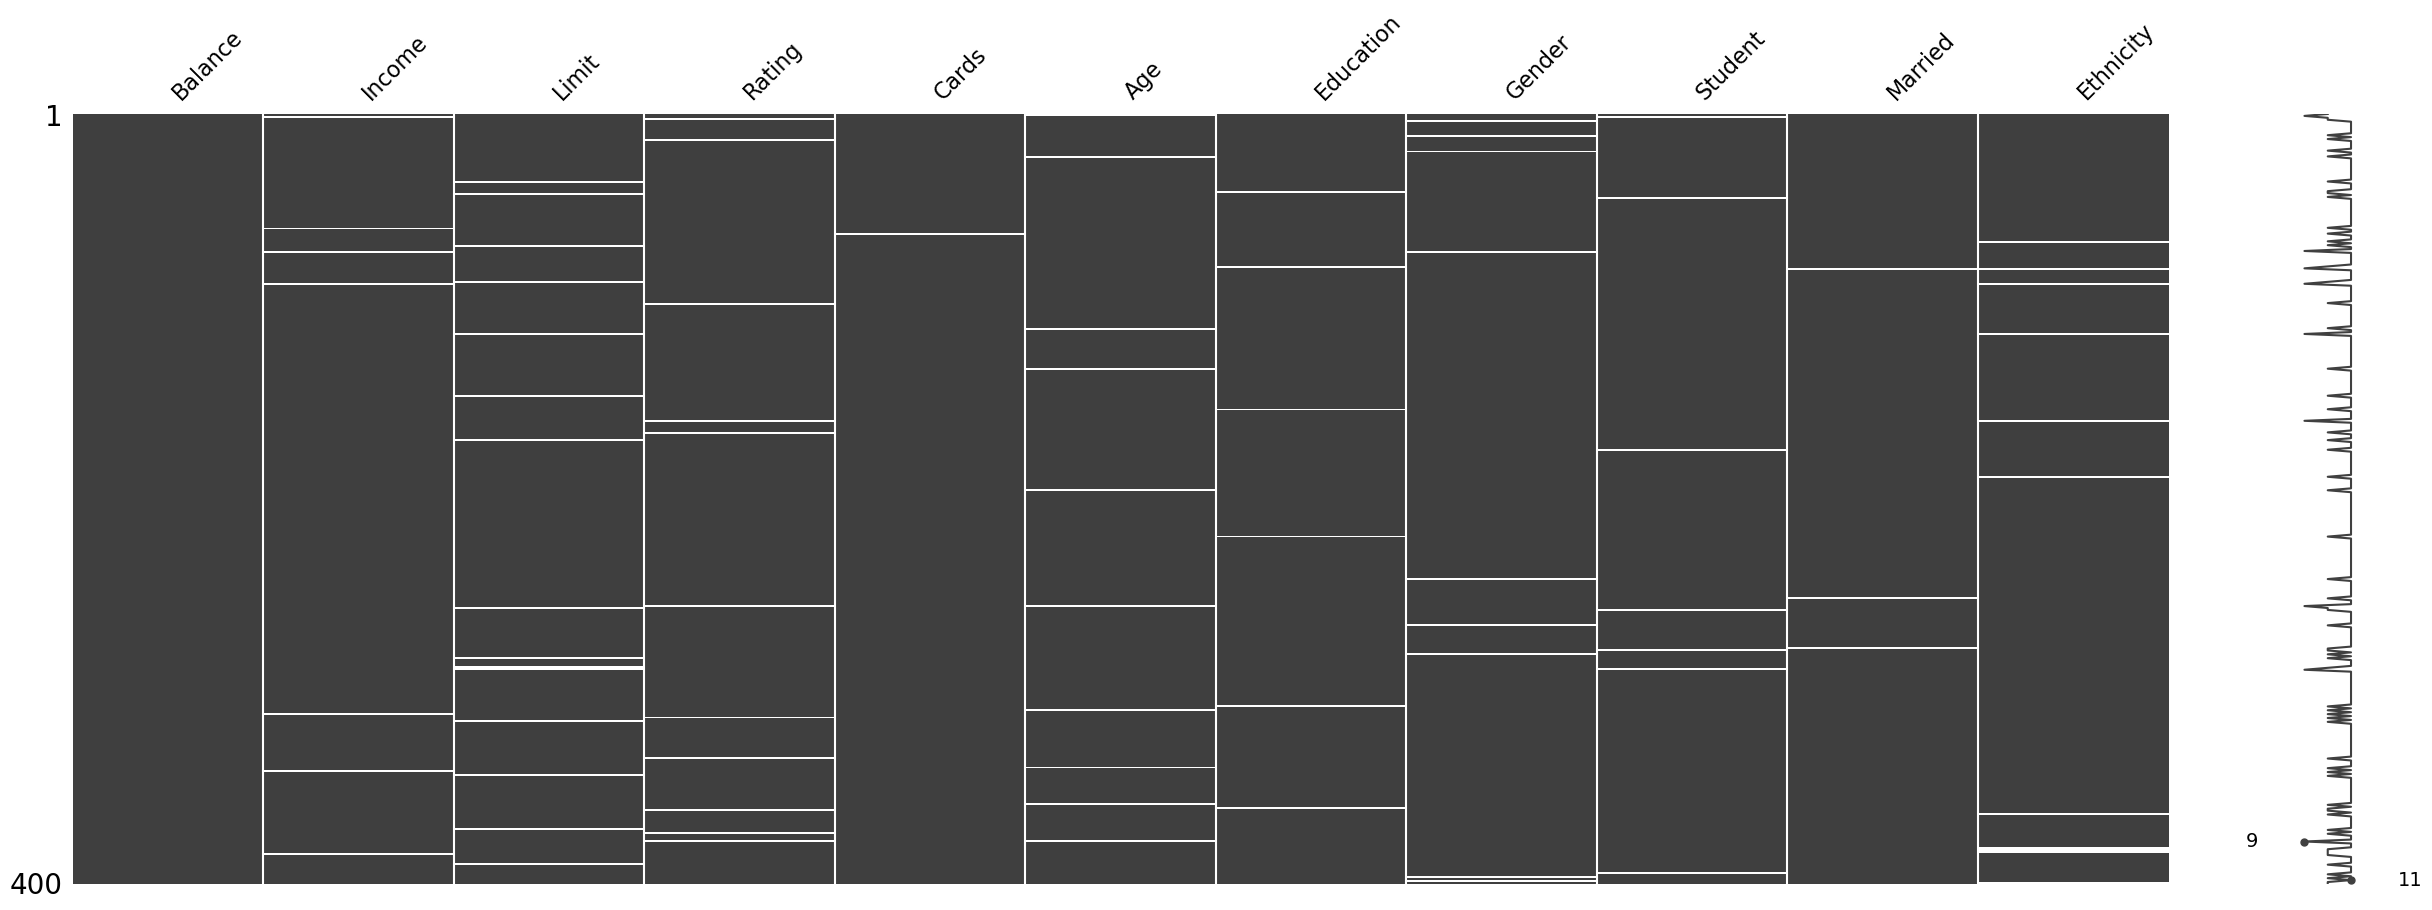

In [13]:
# Plot graphic of missing values
missingno.matrix(balance, figsize = (30,10))

In [14]:
missing_values = balance.isna().sum()
print(balance.shape)
missing_values[:]

(400, 11)


Balance       0
Income        7
Limit        15
Rating       11
Cards         1
Age          10
Education     6
Gender        9
Student       7
Married       3
Ethnicity    11
dtype: int64

### Investigating the missing values in the Income column.
1. What kind of missingness is it, is it  random or non-random?
2. How many missing values are there in total?
3. How is the column related to other variables.
4. Is this a problem that can be solved?
5. If yes, how would you go about solving it?
6. If no, why not?

In [15]:
balance[balance['Income'].isna()]

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
1,23.283334,NaN,6645,483.0,3.0,82.0,15.0,Female,NaN,Yes,Asian
59,16.424095,NaN,5294,390.0,4.0,81.0,17.0,Female,No,No,Caucasian
71,15.275530,NaN,7402,538.0,2.0,81.0,12.0,NaN,No,Yes,Asian
88,7.704156,NaN,4307,352.0,4.0,57.0,8.0,Male,No,Yes,NaN
311,10.292600,NaN,5429,396.0,3.0,57.0,15.0,Female,No,Yes,Caucasian
341,10.737204,NaN,3922,299.0,2.0,77.0,17.0,Female,No,Yes,Caucasian
384,10.512044,NaN,1870,180.0,3.0,76.0,16.0,Male,No,No,African American


Income:
    The mode of missingness can be classified as both `missing not at random (MNAR)`and `missing at random (MAR)` depending on context. For example, in a case where the data was collected by a financial organization of the individuals, they would feel safe sharing the information on there income, but would feel otherwise with third party. In this situation, we assume the data was collected by the later.

In [16]:
balance['Income'].bfill(inplace=True)
balance[balance['Income'].isna()]

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity


### Investigating the missing values in the Limit column:


Missingness:
    The missing limits are at random, `i.e. missing at random (MAR)`, because the variable relates to the income but may not be classified as a sensitive data, and also cannot be estimated from the income.
How to manage it:
 we can fill the missing data 

In [17]:
balance['Limit'].replace('1NA', None, inplace=True)
balance.loc[345]

Balance      12.583455
Income          30.012
Limit             None
Rating           137.0
Cards              2.0
Age               33.0
Education         17.0
Gender            Male
Student             No
Married            Yes
Ethnicity    Caucasian
Name: 345, dtype: object

In [18]:
balance['Limit'] = pd.to_numeric(balance['Limit'])

In [19]:
balance[balance['Limit'].isna()]

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
35,10.246078,23.350,NaN,220.0,3.0,49.0,12.0,Female,Yes,No,Caucasian
41,25.291008,113.659,NaN,538.0,2.0,66.0,15.0,Male,Yes,Yes,African American
68,10.738176,27.847,NaN,418.0,2.0,78.0,15.0,Female,No,Yes,Caucasian
87,8.142728,11.741,NaN,182.0,4.0,59.0,12.0,Female,No,No,Asian
114,5.865162,16.482,NaN,268.0,4.0,41.0,15.0,Male,No,No,NaN
146,8.100880,17.055,NaN,371.0,3.0,55.0,15.0,Female,No,Yes,Caucasian
169,9.514168,27.330,NaN,459.0,4.0,36.0,12.0,Female,No,Yes,Caucasian
256,11.015676,25.936,NaN,135.0,2.0,71.0,14.0,Female,No,No,Asian
282,15.855333,63.534,NaN,581.0,2.0,50.0,17.0,Female,No,Yes,Caucasian
287,15.870095,60.449,NaN,272.0,4.0,69.0,8.0,Male,No,Yes,Caucasian


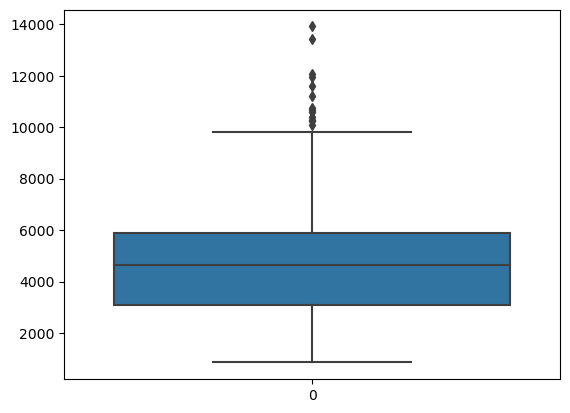

In [20]:
sns.boxplot(data=balance['Limit'])
plt.show()

we input our missing limits with the median, because of the outliers. Outliers affect mean as a central tendency.

In [21]:
balance['Limit'].fillna(balance['Limit'].median(), inplace=True)
balance[balance['Limit'].isna()]

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity


### Investigating the missing values in the Rating column:


In [22]:
balance[balance['Rating'].isna()]

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
2,22.530409,104.593,7075.0,NaN,4.0,71.0,11.0,Male,No,No,Asian
13,10.698984,43.682,6922.0,NaN,1.0,49.0,9.0,Male,No,Yes,Caucasian
98,14.124348,36.295,2963.0,NaN,2.0,68.0,14.0,Female,Yes,No,African American
159,15.521751,53.319,3000.0,NaN,3.0,53.0,13.0,Male,No,No,NaN
165,9.371698,25.383,4527.0,NaN,4.0,46.0,11.0,Male,No,Yes,Caucasian
255,14.658413,58.063,4221.0,NaN,3.0,NaN,8.0,Male,No,No,African American
313,21.542958,92.386,7685.0,NaN,2.0,75.0,18.0,Female,No,Yes,Asian
334,10.429718,24.230,4756.0,NaN,2.0,64.0,15.0,Female,No,Yes,Caucasian
361,14.675619,53.217,4943.0,NaN,2.0,46.0,16.0,Female,No,Yes,Asian
373,15.272098,55.412,5354.0,NaN,2.0,37.0,16.0,Female,Yes,Yes,Caucasian


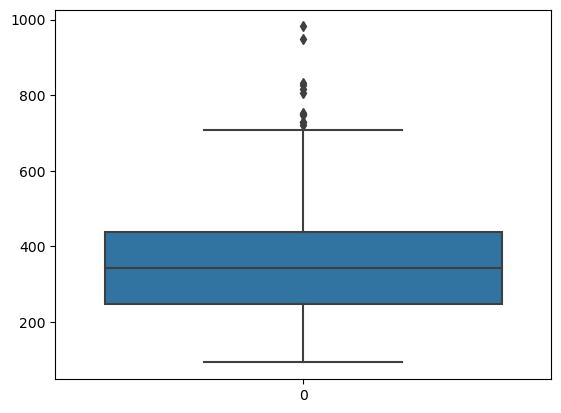

In [23]:
#Check for outliers
sns.boxplot(data=balance['Rating'])
plt.show()

In [24]:
# we input our missing rating with the median, because of the outliers. Outliers affect mean as a central tendency.
balance['Rating'].fillna(balance['Rating'].median(), inplace=True)
balance[balance['Rating'].isna()]

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity


### Investigating the missing value in Cards

this variable of feature can be seen to not relate to anyvariable but by human choice. A person can decide to have any number of cards irrespective of their account due to different reasons. So, it is `missing completely at random (MCAR)`

In [25]:
balance[balance['Cards'].isna()]

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
62,10.987236,30.682,1671.0,160.0,NaN,77.0,7.0,Female,No,No,Caucasian


In [26]:
missing_cards = balance[balance['Cards'].isna()].index
# missing_cards
balance.drop(missing_cards, inplace=True)
balance[balance['Cards'].isna()]

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity


### Investigating the missingness in the Age column:


In [27]:
balance[balance['Age'].isna()]

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
0,12.240798,14.891,3606.0,283.0,2.0,NaN,11.0,Male,No,Yes,Caucasian
22,9.416509,20.103,2631.0,213.0,3.0,NaN,10.0,Male,No,Yes,African American
111,15.015230,28.575,2959.0,231.0,2.0,NaN,11.0,Female,No,No,African American
132,10.101118,23.283,5443.0,407.0,4.0,NaN,13.0,Male,No,Yes,African American
195,9.415951,23.883,5384.0,398.0,2.0,NaN,16.0,Female,No,Yes,African American
255,14.658413,58.063,4221.0,344.0,3.0,NaN,8.0,Male,No,No,African American
309,14.812833,75.257,7010.0,494.0,3.0,NaN,18.0,Female,No,Yes,Caucasian
339,30.355899,149.316,10278.0,707.0,1.0,NaN,16.0,Male,No,No,African American
358,11.064765,30.111,4336.0,339.0,1.0,NaN,18.0,Male,No,Yes,Caucasian
377,10.463915,28.144,1567.0,344.0,3.0,NaN,10.0,Male,No,Yes,Caucasian


The age variable can be seen to not follow a specific path or be missing for any specific reason. 
This can be acknowledged to be missing completely at random.

In [28]:
# We'll be filling the missing variables with the next recorded observation.
balance['Age'].bfill(inplace=True)
balance[balance['Age'].isna()]

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity


### Investigating missingness in the Education variable

In [29]:
balance[balance['Education'].isna()]

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
40,12.029646,34.950,3327.0,253.0,3.0,54.0,NaN,Female,No,No,African American
79,9.566159,15.354,2101.0,171.0,2.0,65.0,NaN,Male,No,No,Asian
153,19.370810,92.112,4612.0,344.0,3.0,32.0,NaN,Male,No,No,Caucasian
219,11.738968,38.954,5222.0,370.0,4.0,76.0,NaN,Female,No,No,Caucasian
307,16.801395,75.406,3874.0,298.0,3.0,41.0,NaN,Female,No,Yes,Asian
360,14.828746,53.566,5891.0,434.0,4.0,82.0,NaN,Female,No,No,Caucasian


In [30]:
balance['Education'].bfill(inplace=True)
balance[balance['Education'].isna()]

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity


### Investigating missingness in the Gender column:

In [31]:
balance[balance['Gender'].isna()]

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
3,27.652811,148.924,9504.0,681.0,3.0,36.0,11.0,NaN,No,No,Asian
11,9.467308,15.045,1311.0,138.0,3.0,64.0,16.0,NaN,No,No,Caucasian
19,13.236249,42.079,6626.0,479.0,2.0,44.0,9.0,NaN,No,No,Asian
71,15.275530,22.939,7402.0,538.0,2.0,81.0,12.0,NaN,No,Yes,Asian
241,4.946544,15.602,906.0,103.0,2.0,36.0,11.0,NaN,No,Yes,African American
265,12.140614,40.885,5013.0,379.0,3.0,46.0,13.0,NaN,No,Yes,African American
280,13.909047,53.401,5319.0,377.0,3.0,35.0,12.0,NaN,No,No,African American
396,9.943838,13.364,3838.0,296.0,5.0,65.0,17.0,NaN,No,No,African American
398,12.001071,37.728,2525.0,192.0,1.0,44.0,13.0,NaN,No,Yes,Caucasian


In [32]:
# The gender is MAR, so we input it with the preceeding values.
balance['Gender'].ffill(inplace=True)
balance[balance['Gender'].isna()]

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity


### Investigating the Student variable:

In [33]:
balance[balance['Student'].isna()]

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
1,23.283334,104.593,6645.0,483.0,3.0,82.0,15.0,Female,NaN,Yes,Asian
43,12.319976,36.929,6257.0,445.0,1.0,24.0,14.0,Female,NaN,Yes,Asian
174,26.634735,121.834,10673.0,750.0,3.0,54.0,16.0,Male,NaN,No,African American
257,7.644987,15.629,2493.0,186.0,1.0,60.0,14.0,Male,NaN,Yes,Asian
278,25.941647,128.040,6982.0,518.0,2.0,78.0,11.0,Female,NaN,Yes,Caucasian
288,8.868959,16.711,4636.0,387.0,3.0,42.0,16.0,Female,NaN,Yes,Asian
394,14.735482,49.794,5758.0,410.0,4.0,40.0,8.0,Male,NaN,No,Caucasian


In [34]:
# The student is MCAR, so we forward fill.
balance['Student'].ffill(inplace=True)
balance[balance['Student'].isna()]

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity


### Investigating the married variable:

In [35]:
balance[balance['Married'].isna()]

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
80,10.060073,27.369,3449.0,288.0,3.0,40.0,9.0,Female,No,NaN,NaN
251,11.834544,28.474,3202.0,267.0,5.0,66.0,12.0,Male,No,NaN,Caucasian
277,12.289482,41.532,5000.0,353.0,2.0,50.0,12.0,Male,No,NaN,Caucasian


Since marital atus is not a kind of sensitive information that one could hide in a survey, we can conclude that it is missing complete at random. To fix this we will fill the missing vlaues using forward propagation (ffill)

In [36]:
balance['Married'].ffill(inplace=True)
balance[balance['Married'].isna()]

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity


In [37]:
balance[balance['Ethnicity'].isna()]

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
66,22.781028,113.829,9704.0,694.0,4.0,38.0,13.0,Female,No,Yes,NaN
80,10.060073,27.369,3449.0,288.0,3.0,40.0,9.0,Female,No,No,NaN
88,7.704156,59.530,4307.0,352.0,4.0,57.0,8.0,Male,No,Yes,NaN
114,5.865162,16.482,4636.0,268.0,4.0,41.0,15.0,Male,No,No,NaN
159,15.521751,53.319,3000.0,344.0,3.0,53.0,13.0,Male,No,No,NaN
188,18.439668,83.869,7667.0,554.0,2.0,83.0,11.0,Male,No,No,NaN
363,16.190532,64.173,6127.0,433.0,1.0,80.0,10.0,Male,No,Yes,NaN
381,24.949141,101.788,8029.0,574.0,2.0,84.0,11.0,Male,No,Yes,NaN
382,4.843015,24.824,5495.0,409.0,1.0,33.0,9.0,Male,Yes,No,NaN
383,7.192237,14.292,3274.0,282.0,9.0,64.0,9.0,Male,No,Yes,NaN


In [38]:
# Since ethnicity is not a kind of sensitive information that one could hide in a survey, we can conclude that it is missing complete at random. To fix this 
# we will fill the missing vlaues using forward propagation (ffill)

balance['Ethnicity'].ffill(inplace=True)
balance[balance['Ethnicity'].isna()]

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity


In [39]:
balance[balance.isna().any(axis=1)]

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity


In [40]:
# print('Before droping missing column.')
# print(balance[balance['Cards'].isna()])
# balance.drop(62, inplace=True)
# print('After droping missing column.')
# print(balance[balance['Cards'].isna()])

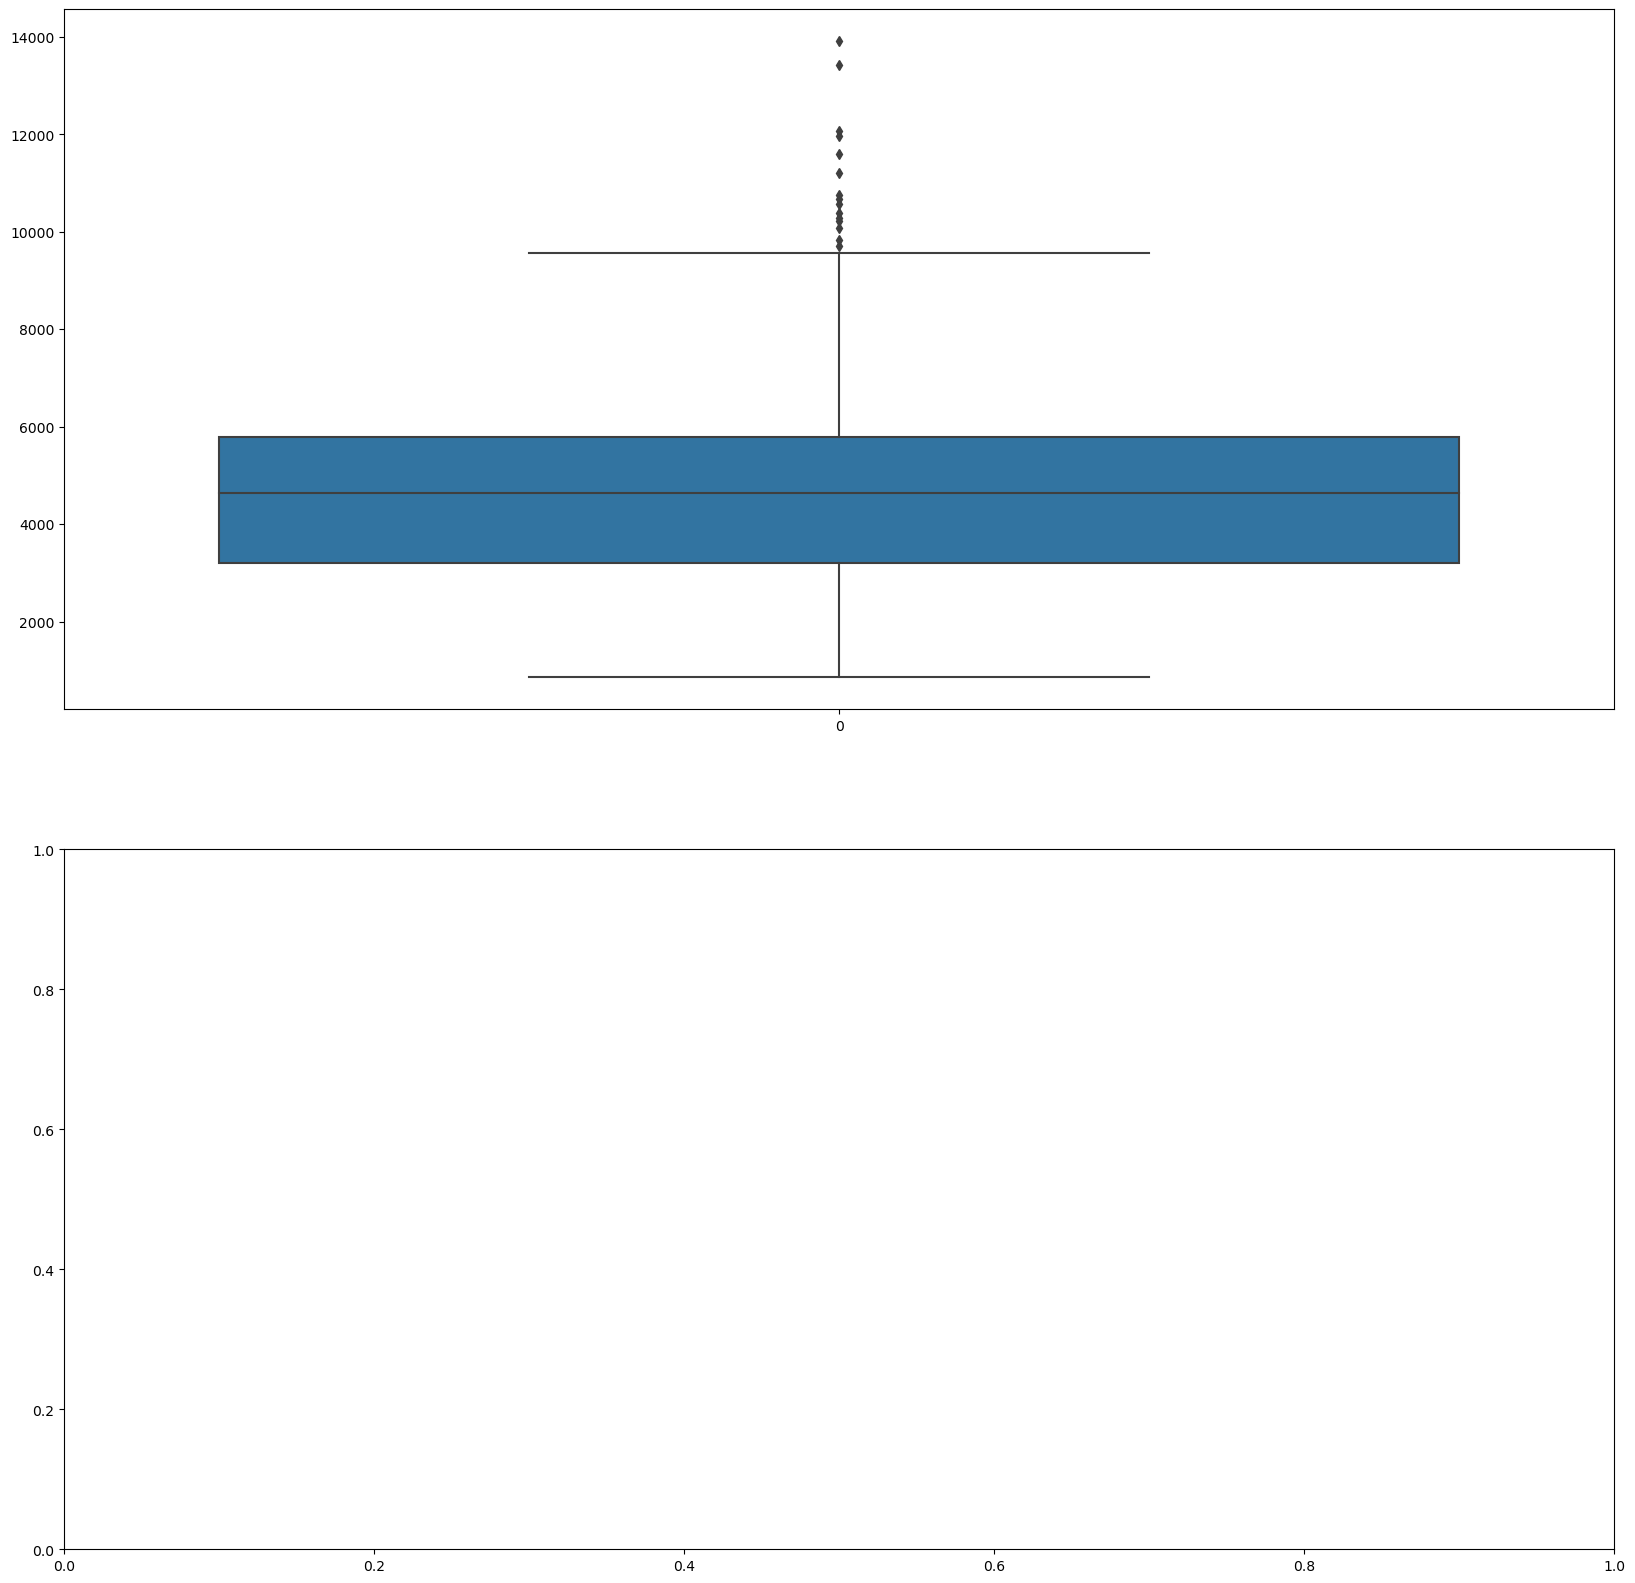

<class 'pandas.core.frame.DataFrame'>
Index: 399 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Balance    399 non-null    float64
 1   Income     399 non-null    float64
 2   Limit      399 non-null    float64
 3   Rating     399 non-null    float64
 4   Cards      399 non-null    float64
 5   Age        399 non-null    float64
 6   Education  399 non-null    float64
 7   Gender     399 non-null    object 
 8   Student    399 non-null    object 
 9   Married    399 non-null    object 
 10  Ethnicity  399 non-null    object 
dtypes: float64(7), object(4)
memory usage: 53.6+ KB


In [41]:
fig, ax = plt.subplots(nrows=2,ncols=1, figsize=(20, 20))
sns.boxplot(data=balance['Limit'], ax=ax[0])
plt.show()
balance.info()

<Axes: >

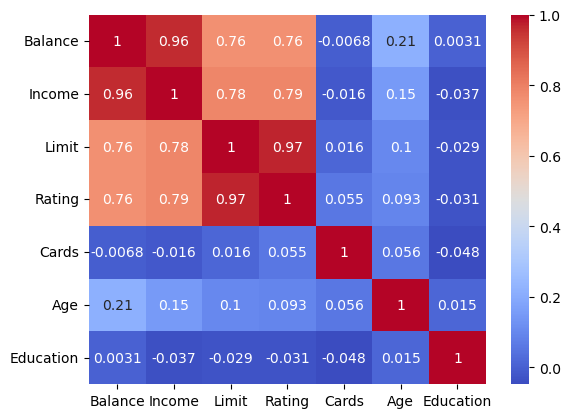

In [42]:
correlation = balance.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")

We can now visualise the missing data and start strategising. We handled missing data in this data set in the previous task so if you need any refreshers refer to the previous task. 


#####  4. Where are the outliers and why should pay attention to them?

To perform our data analysis, let's create two new dataframes.

We'll create one for exploring discretised continuous variables (continuous variables which have been sorted into some kind of category) and another for exploring continuous variables.



In [43]:
df_bin = balance      # for discretised continuous variables
df_con = balance      # for continuous variables

Let's explore each of these features individually.

We'll go through each column iteratively and see which ones to use in our first models. Some may need more preprocessing than others to get ready.

Gender
Female    206
 Male     193
Name: count, dtype: int64


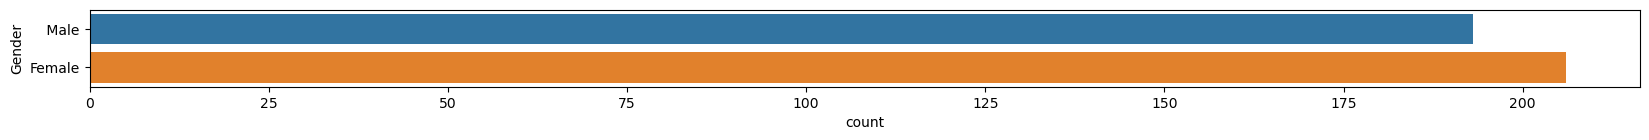

In [44]:
# How many clients are Male and Female
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Gender', data=df_bin);
print(df_bin.Gender.value_counts())

We can see that we have a little more females than male. This could be a coincidence or could be a real representation of the banks client list. Though the difference is not that significant.

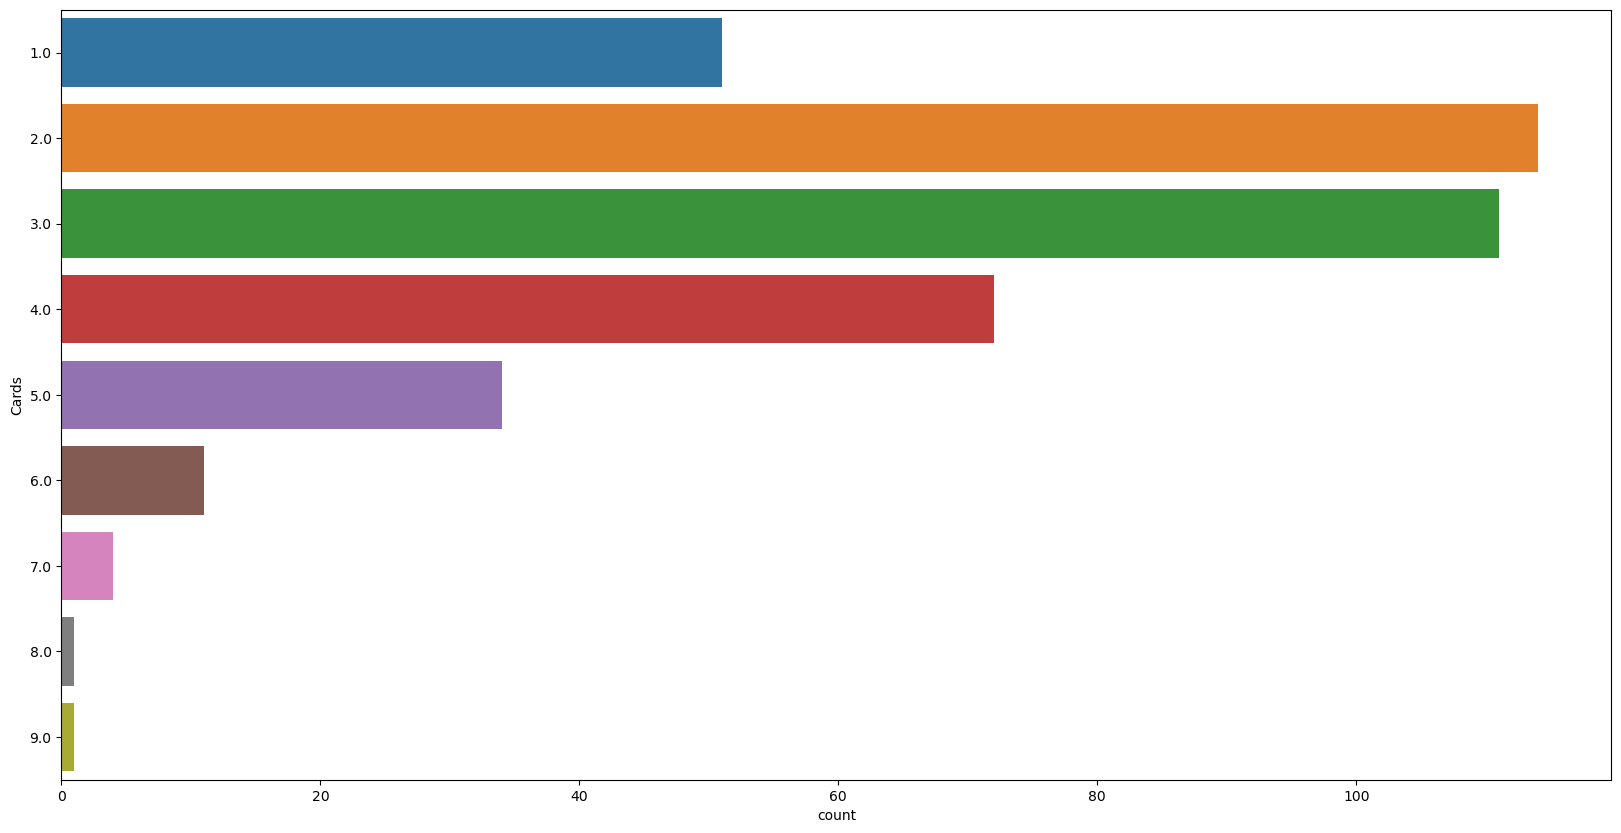

In [45]:
fig = plt.figure(figsize=(20,10))
sns.countplot(y=df_bin['Cards'], data=df_bin);

We can see with this feature, the values are numerical (1, 2 upto 8) but they are categories.

We can deduce that most clients have 2 to three 3 cards. An important thing to note is the average balance or income for every category.




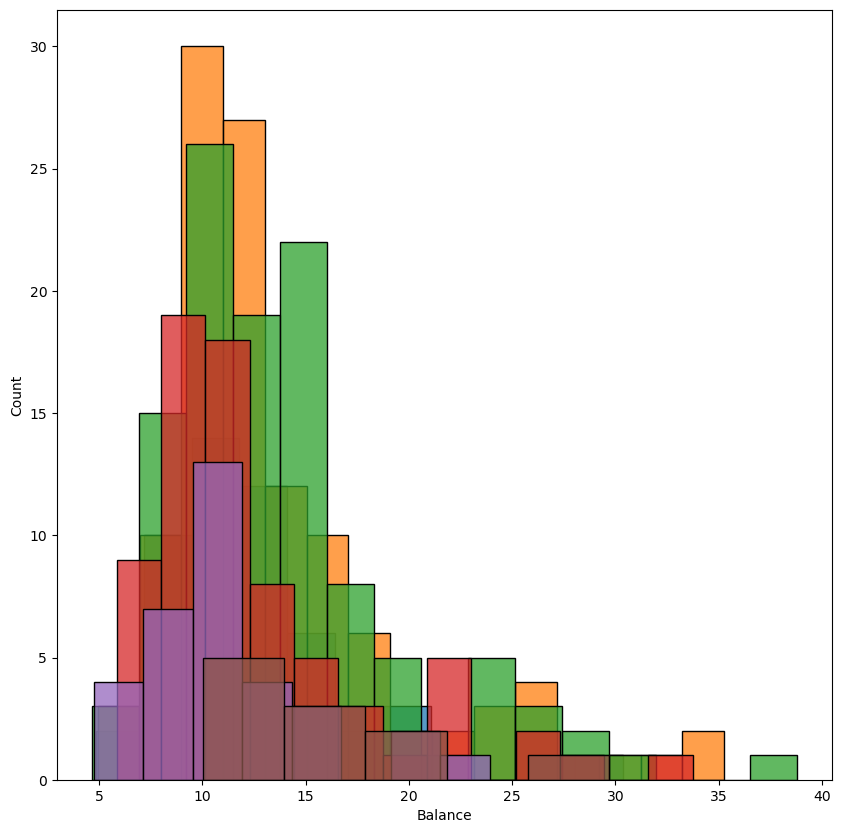

In [54]:
fig = plt.figure(figsize=(10, 10))
sns.histplot(df_bin.loc[df_bin['Cards'] == 1]['Balance'], kde_kws={'label': 'Cards = 1'});
sns.histplot(df_bin.loc[df_bin['Cards'] == 2]['Balance'], kde_kws={'label': 'Cards = 2'});
sns.histplot(df_bin.loc[df_bin['Cards'] == 3]['Balance'], kde_kws={'label': 'Cards = 3'});
sns.histplot(df_bin.loc[df_bin['Cards'] == 4]['Balance'], kde_kws={'label': 'Cards = 4'});
sns.histplot(df_bin.loc[df_bin['Cards'] == 5]['Balance'], kde_kws={'label': 'Cards = 5'});
sns.histplot(df_bin.loc[df_bin['Cards'] == 6]['Balance'], kde_kws={'label': 'Cards = 6'});




The plot above allows us to see that having different number of cards can be able to describe to us the balance that a client may have. 

Student
No     360
Yes     39
Name: count, dtype: int64

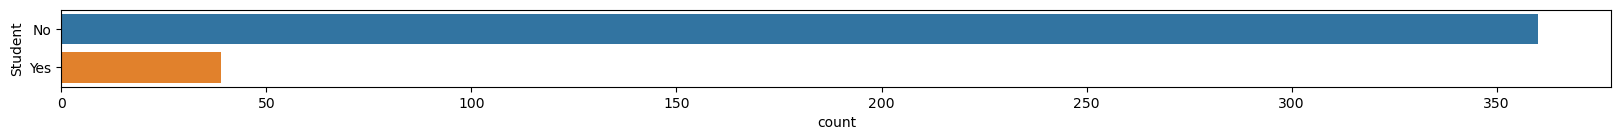

In [47]:
## Fill in the same analysis for for the categorical variables 
# Student, Married and Ethnicity with corresponding plots and story lines

fig = plt.figure(figsize=(20,1))
sns.countplot(y=df_bin['Student'], data=df_bin);

df_bin['Student'].value_counts()






From this, we can see that the survey cover a significantly more non-student population students. From this, we can deduce that the bank possibly offer more of non-student rrelated services.

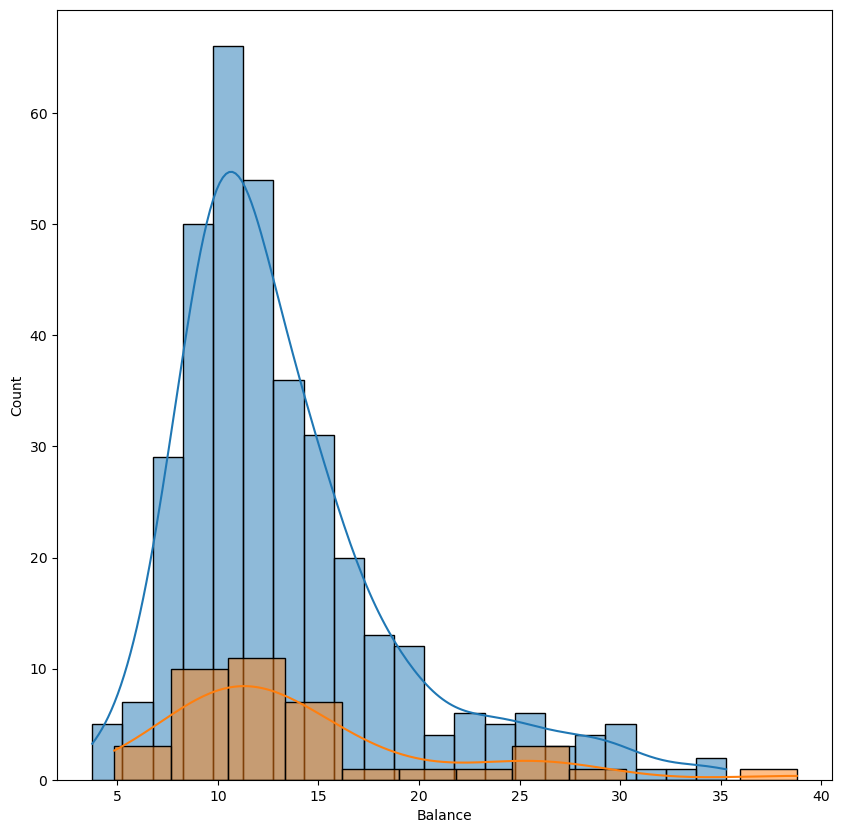

In [48]:
fig = plt.figure(figsize=(10, 10))
sns.histplot(df_bin.loc[df_bin['Student'] == 'No']['Balance'], kde=True);
sns.histplot(df_bin.loc[df_bin['Student'] == 'Yes']['Balance'], kde=True);

It can be seen that the distribution of balance by student status is positively skewed for both groups.

Ethnicity
Caucasian           194
Asian               104
African American    101
Name: count, dtype: int64

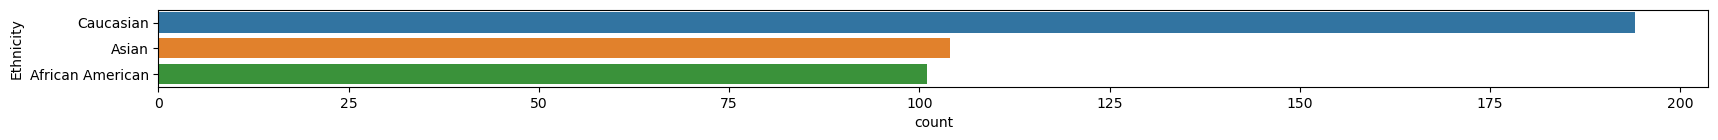

In [49]:
# Ethnicity

fig = plt.figure(figsize=(20,1))
sns.countplot(y=df_bin['Ethnicity'], data=df_bin);

df_bin['Ethnicity'].value_counts()


The sample of caucasians who responded in the survey is almost double of any other group. This could be influenced by the location of the bank branch.

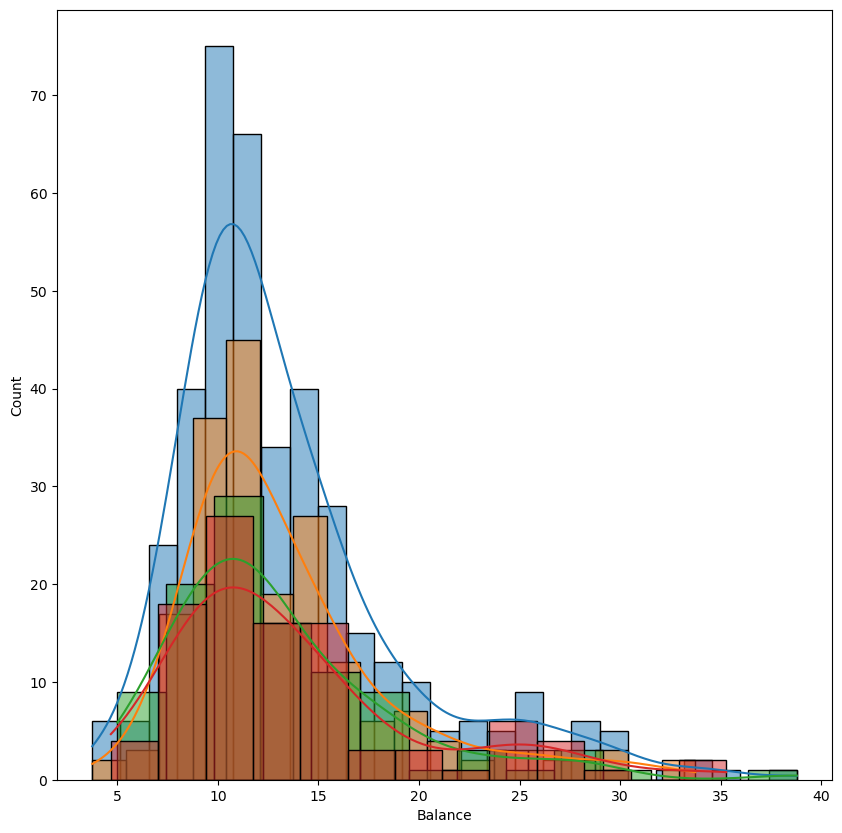

In [59]:
fig = plt.figure(figsize=(10, 10))
sns.histplot(df_bin['Balance'], kde=True); # General distribution of balance.

# Distribution of balance by ethnicity.
sns.histplot(df_bin.loc[df_bin['Ethnicity'] == 'Caucasian']['Balance'], kde=True);
sns.histplot(df_bin.loc[df_bin['Ethnicity'] == 'Asian']['Balance'], kde=True);
sns.histplot(df_bin.loc[df_bin['Ethnicity'] == 'African American']['Balance'], kde=True);

Married
Yes    243
No     156
Name: count, dtype: int64

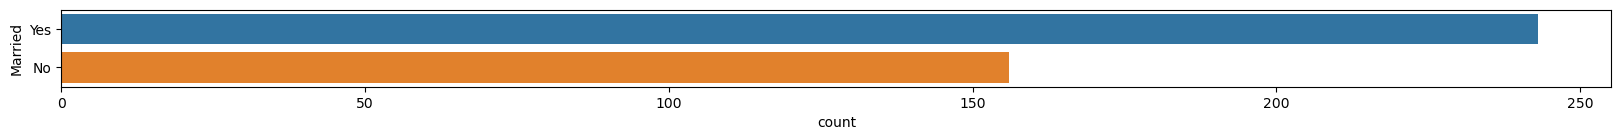

In [57]:
# Married

fig = plt.figure(figsize=(20,1))
sns.countplot(y=df_bin['Married'], data=df_bin);

df_bin['Married'].value_counts()


The distribution of our samples cover more married population than unmarried. This could be the nature of the bank due to its rendered services, or due to it's location.

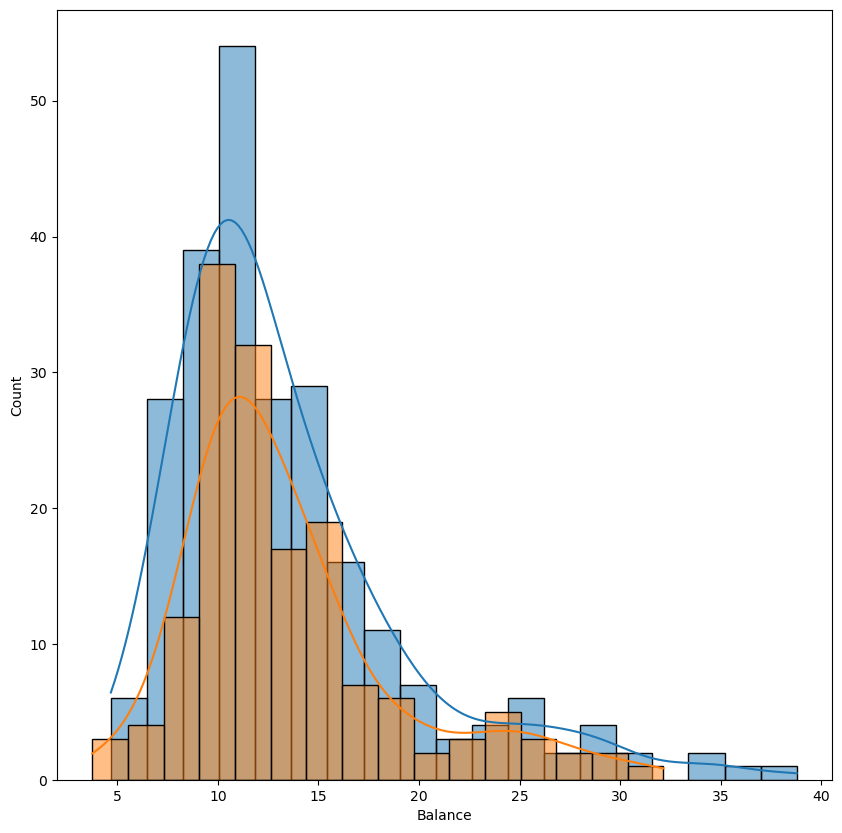

In [61]:
fig = plt.figure(figsize=(10, 10))
sns.histplot(df_bin.loc[df_bin['Married'] == 'Yes']['Balance'], kde=True);
sns.histplot(df_bin.loc[df_bin['Married'] == 'No']['Balance'], kde=True);

**Note worthy:** All sub-categories tested so far for discretized features tend to have an homogeneous distribution of balance.

#### 5. How can you add, change or remove features to get more out of your data?


Now let us look at the age variable, I would like to say that it is a category variable but it has too many categories. Let up plot this to prove it.

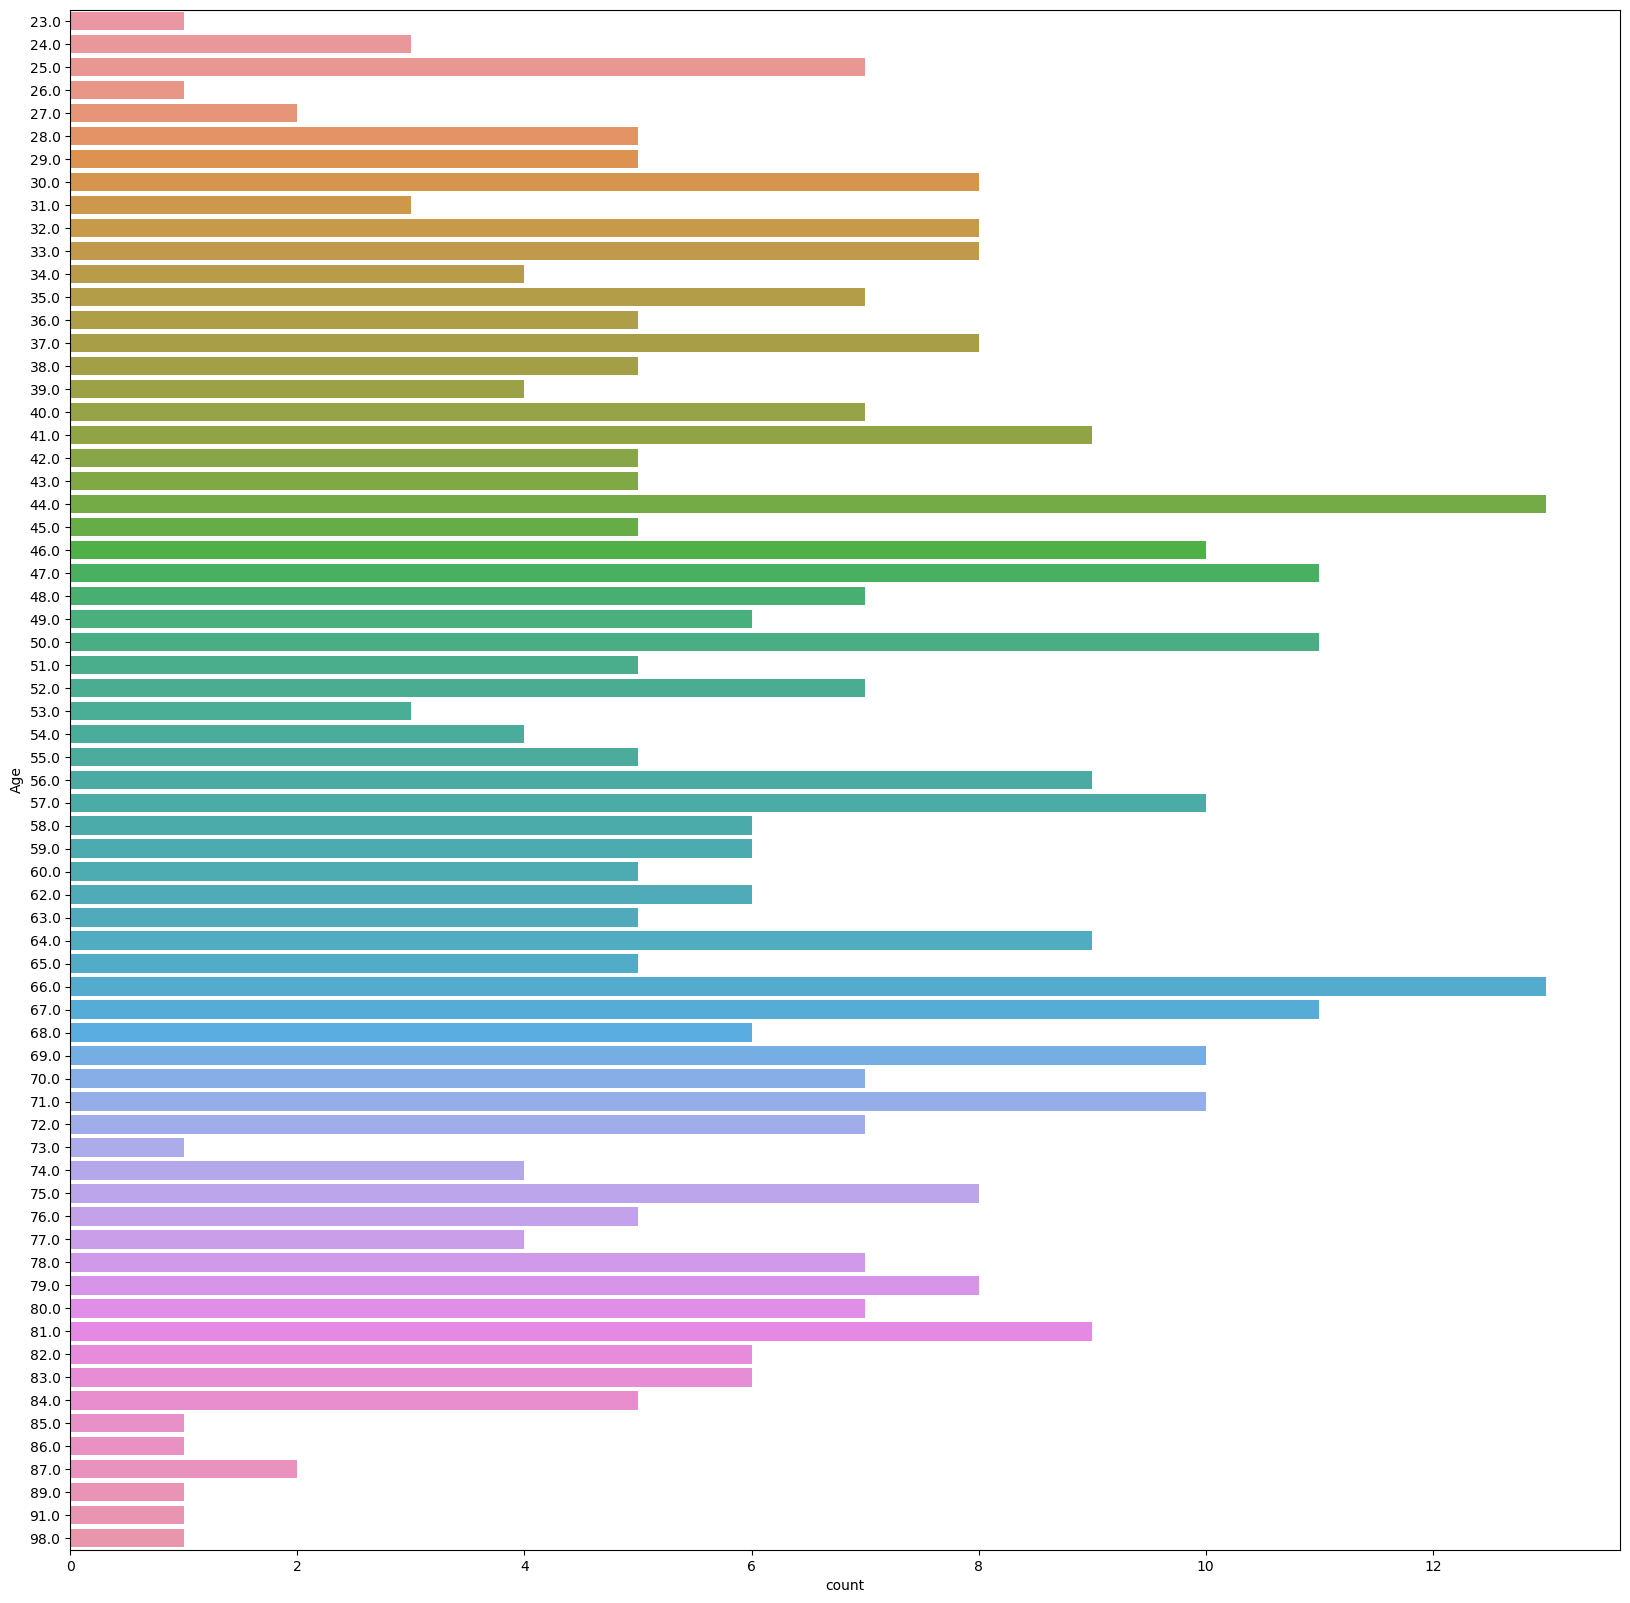

In [62]:
fig = plt.figure(figsize=(20,20))
sns.countplot(y=df_bin['Age'], data=df_bin);

These are so many categories to analyse. Some categorical variables such as this can be put into groups. Since we are dealing with age, let us try and put the clients into age groups. We can do this by putting them into age groups of 10 or 5 years. For this analysis let us do so for 10 years. So we will start with age group 20-29 then 30-39 and so on.

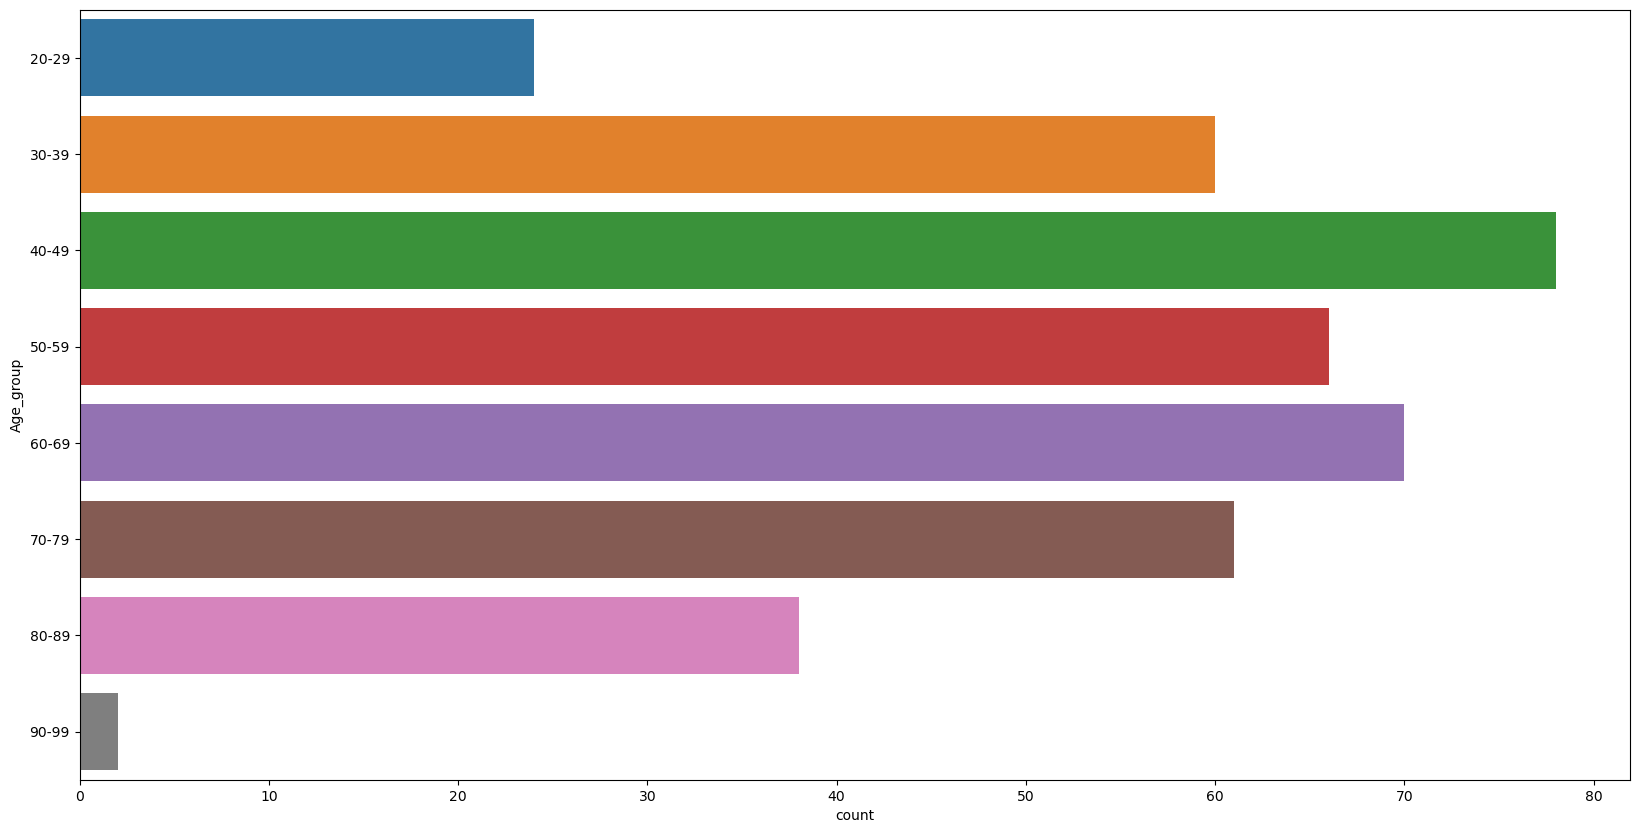

In [63]:
df_bin['Age_group'] = pd.cut(df_bin['Age'], [20,29,39,49,59,69,79,89,99], 
                   labels=['20-29','30-39','40-49','50-59','60-69','70-79',
                           '80-89','90-99'])

fig = plt.figure(figsize=(20,10))
sns.countplot(y=df_bin['Age_group'], data=df_bin);


Great! Now the categories above make more sense and can be used for analysis. Majority of the Bank's clients are between the ages of 30 to 79. Feel free to practice with other comparison variables, such as number of cards in each age group or even gender.

We will do the analysis of age groups with Balance and Income.

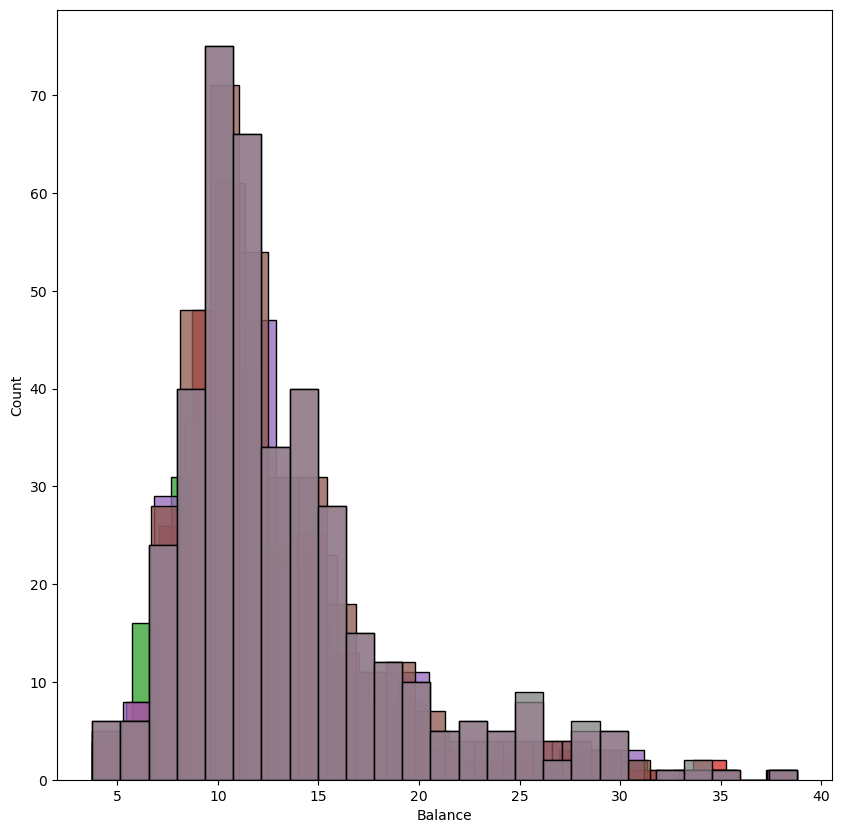

In [64]:
fig = plt.figure(figsize=(10, 10))
sns.histplot(df_bin.loc[df_bin['Age'] < 29 ]['Balance'], kde_kws={'label': 'Age < 29'});
sns.histplot(df_bin.loc[df_bin['Age'] < 39 ]['Balance'], kde_kws={'label': 'Age < 39'});
sns.histplot(df_bin.loc[df_bin['Age'] < 49 ]['Balance'], kde_kws={'label': 'Age < 49'});
sns.histplot(df_bin.loc[df_bin['Age'] < 59 ]['Balance'], kde_kws={'label': 'Age < 59'});
sns.histplot(df_bin.loc[df_bin['Age'] < 69 ]['Balance'], kde_kws={'label': 'Age < 69'});
sns.histplot(df_bin.loc[df_bin['Age'] < 79 ]['Balance'], kde_kws={'label': 'Age < 79'});
sns.histplot(df_bin.loc[df_bin['Age'] < 89 ]['Balance'], kde_kws={'label': 'Age < 89'});
sns.histplot(df_bin.loc[df_bin['Age'] < 99 ]['Balance'], kde_kws={'label': 'Age < 99'});




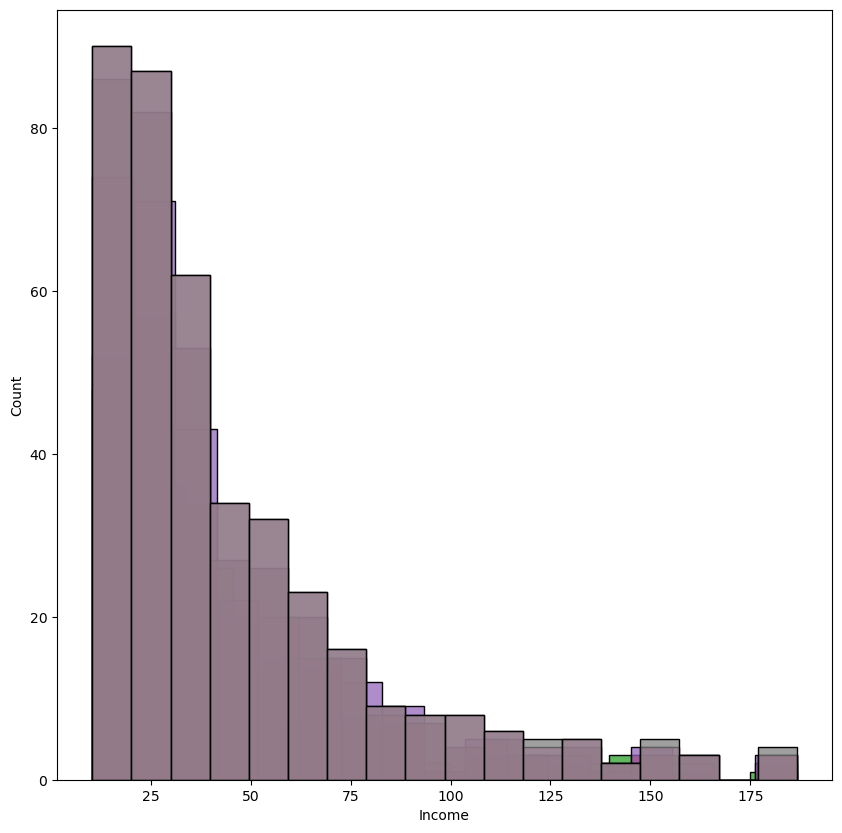

In [65]:
fig = plt.figure(figsize=(10, 10))
sns.histplot(df_bin.loc[df_bin['Age'] < 29 ]['Income'], kde_kws={'label': 'Age < 29'});
sns.histplot(df_bin.loc[df_bin['Age'] < 39 ]['Income'], kde_kws={'label': 'Age < 39'});
sns.histplot(df_bin.loc[df_bin['Age'] < 49 ]['Income'], kde_kws={'label': 'Age < 49'});
sns.histplot(df_bin.loc[df_bin['Age'] < 59 ]['Income'], kde_kws={'label': 'Age < 59'});
sns.histplot(df_bin.loc[df_bin['Age'] < 69 ]['Income'], kde_kws={'label': 'Age < 69'});
sns.histplot(df_bin.loc[df_bin['Age'] < 79 ]['Income'], kde_kws={'label': 'Age < 79'});
sns.histplot(df_bin.loc[df_bin['Age'] < 89 ]['Income'], kde_kws={'label': 'Age < 89'});
sns.histplot(df_bin.loc[df_bin['Age'] < 99 ]['Income'], kde_kws={'label': 'Age < 99'});




Clearly different age groups have different ranges of incomes and balances that can be further explored by Gender, Ethnicity and the cycle continues..

Ultimately, there’s no limit to the number of experiments one can perform in the EDA process – it completely depends on what you’re analysing, as well as the knowledge of packages such as Pandas and matplotlib our job becomes easier.



**Observation:** the last 2 visualizations seem to be using the cumulative of each age group with the previous ones and not the balance of the actual age group.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


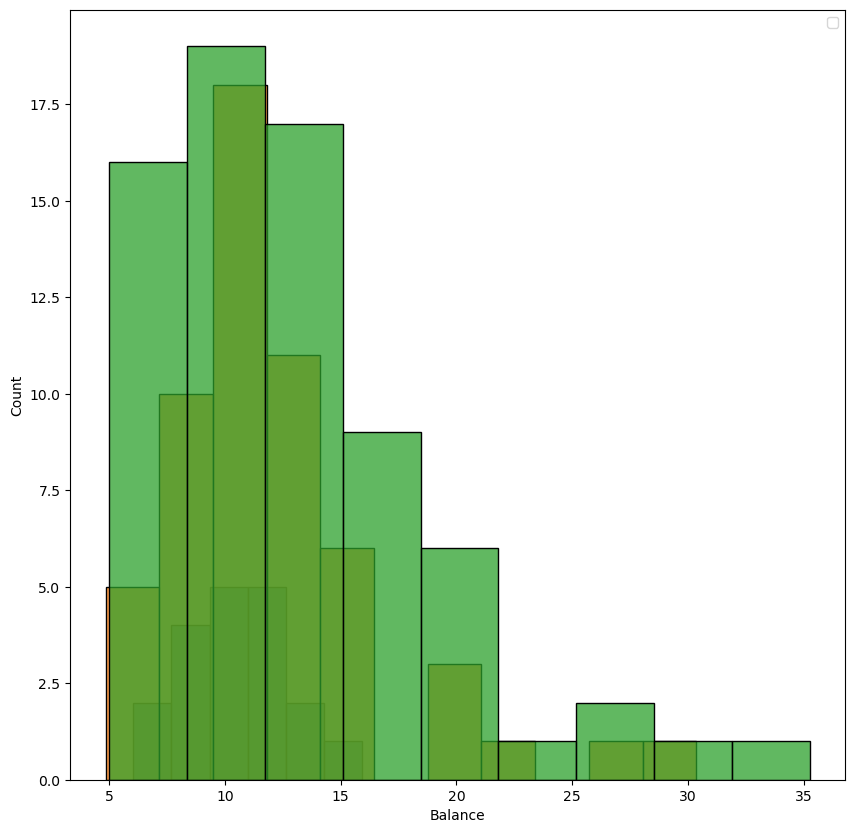

In [69]:
fig = plt.figure(figsize=(10, 10))
sns.histplot(df_bin.loc[(df_bin['Age'] >= 20) & (df_bin['Age'] < 29) ]['Balance'], kde_kws={'label': 'Age < 29'});
sns.histplot(df_bin.loc[(df_bin['Age'] >= 30) & (df_bin['Age'] < 39) ]['Balance'], kde_kws={'label': 'Age < 39'});
sns.histplot(df_bin.loc[(df_bin['Age'] >= 40) & (df_bin['Age'] < 49) ]['Balance'], kde_kws={'label': 'Age < 49'});
# sns.histplot(df_bin.loc[df_bin['Age'] < 59 ]['Balance'], kde_kws={'label': 'Age < 59'});
# sns.histplot(df_bin.loc[df_bin['Age'] < 69 ]['Balance'], kde_kws={'label': 'Age < 69'});
# sns.histplot(df_bin.loc[df_bin['Age'] < 79 ]['Balance'], kde_kws={'label': 'Age < 79'});
# sns.histplot(df_bin.loc[df_bin['Age'] < 89 ]['Balance'], kde_kws={'label': 'Age < 89'});
# sns.histplot(df_bin.loc[df_bin['Age'] < 99 ]['Balance'], kde_kws={'label': 'Age < 99'});

# plt.legend()

## Compulsory Task 

Use the Titanic dataset provided to perform your analysis. Provide an indepth and creative EDA on the data set.